<a href="https://colab.research.google.com/github/lukaszchomatek/colab-dl-demos/blob/master/regression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# dataset import
from sklearn.datasets import fetch_openml
df = fetch_openml(name="boston", version=1, as_frame=True).frame

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()
print(df.corr(numeric_only=True)["MEDV"].sort_values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
AGE       -0.376955
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695

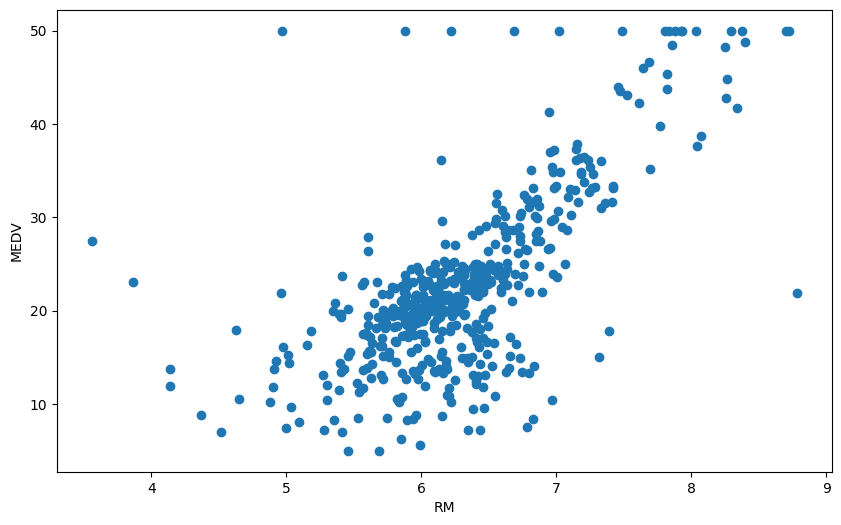

In [31]:
feature = "RM"

plt.figure(figsize=(10, 6))
plt.scatter(df[feature], df["MEDV"])
plt.xlabel(feature)
plt.ylabel("MEDV")
plt.show()

In [32]:
X = df[[feature]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE", mse)
print("r2", r2)

MSE 46.144775347317264
r2 0.3707569232254778


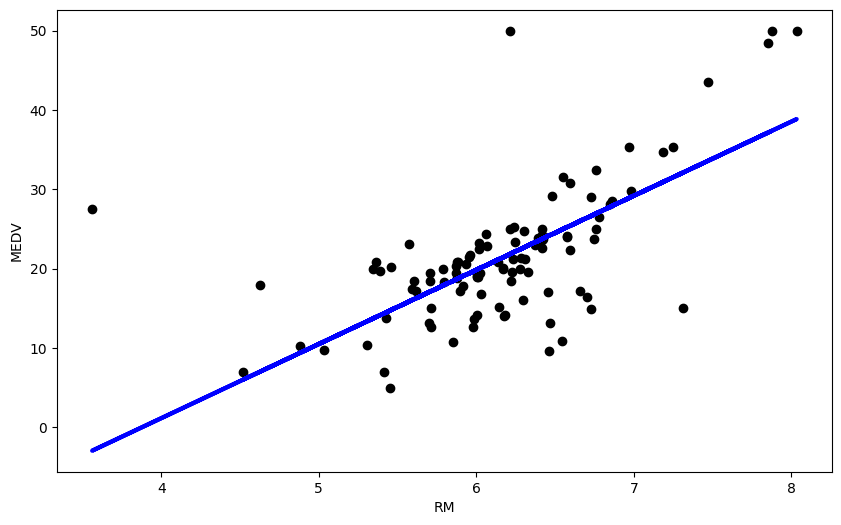

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel(feature)
plt.ylabel("MEDV")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Neural Network MSE: 36.30581953328553
Neural Network R2: 0.5049236795282546


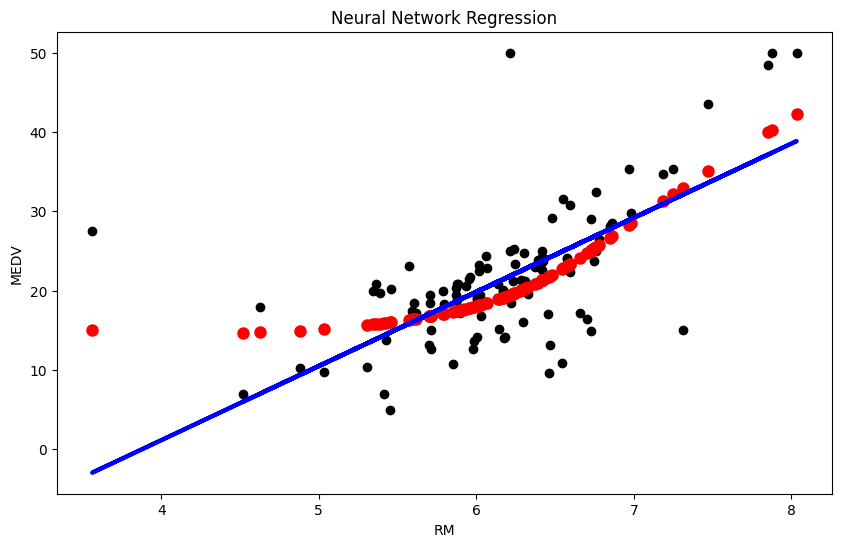

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a 3-layer neural network model
model_nn = Sequential([
    Dense(256,activation='gelu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='gelu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Train the model
history = model_nn.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

# Make predictions
y_pred_nn = model_nn.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network MSE:", mse_nn)
print("Neural Network R2:", r2_nn)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test, y_pred_nn, color="red", linewidth=3)
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel(feature)
plt.ylabel("MEDV")
plt.title("Neural Network Regression")
plt.show()